<a href="https://colab.research.google.com/github/Fasiloc/Mathematics_learn-repo/blob/main/Classes/Day_18_Gradient_and_newton's_method_in_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient- Descent Method

Gradient Descent is an optimization algorithm in machine learning used to minimize a function by iteratively moving towards the minimum value of the function.

> Algorithm

1. input: function $g$, steplength $\alpha$, maximum number of steps $K$, and initial point $\mathbf{w}^0$

2. `for` $\,\,k = 1...K$
$\quad\quad\quad\mathbf{w}^k = \mathbf{w}^{k-1} - \alpha \nabla g\left(\mathbf{w}^{k-1}\right)$
4.  output: history of weights $\left\{\mathbf{w}^{k}\right\}_{k=0}^K$ and corresponding function evaluations $\left\{g\left(\mathbf{w}^{k}\right)\right\}_{k=0}^K$

Optimize the function Cost function $f(x) = x^3-4x^2+6$

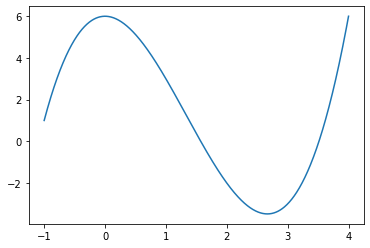

In [ ]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
f_x = lambda x: (x**3)-4*(x**2)+6
x = np.linspace(-1,4,1000)#Plot the curve
plt.plot(x, f_x(x))
plt.show()

Now find the derivative of $f(x)$ and use it to define gradient-descent  Let’s create a function to plot gradient descent and also a function to calculate gradient descent by passing a fixed number of iterations as one of the inputs.algorithm.

In [ ]:
f_x_derivative = lambda x: 3*(x**2)-8*x

In [ ]:
# function to plot gradient
def plot_gradient(x, y, x_vis, y_vis):
    plt.subplot(1,2,2)
    plt.scatter(x_vis, y_vis, c = "b")
    plt.plot(x, f_x(x), c = "r")
    plt.title("Gradient Descent")
    plt.show()
    plt.subplot(1,2,1)
    plt.scatter(x_vis, y_vis, c = "b")
    plt.plot(x,f_x(x), c = "r")
    plt.xlim([2.0,3.0])
    plt.title("Zoomed in Figure")
    plt.show()


In [ ]:
def gradient_iterations(x_start, iterations, learning_rate):
     
    # These x and y value lists will be used later for visualization.
    x_grad = [x_start]
    y_grad = [f_x(x_start)]
    # Keep looping until number of iterations
    for i in range(iterations):
        # Get the Slope value from the derivative function for x_start
        # Since we need negative descent (towards minimum), we use '-' of derivative
        x_start_derivative = - f_x_derivative(x_start)
        x_grad.append(x_start)
        y_grad.append(f_x(x_start))
        print ("Local minimum occurs at: {:.2f}".format(x_start))
    print ("Number of steps: ",len(x_grad)-1)
    plot_gradient(x, f_x(x) ,x_grad, y_grad)


Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local minimum occurs at: 0.50
Local mini

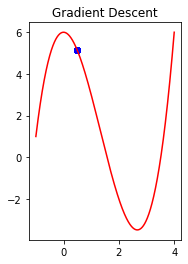

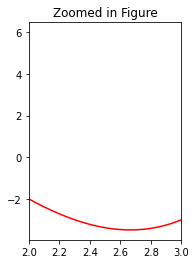

In [ ]:
# calling gradient-descent algorithm
gradient_iterations(0.5, 1000, 0.05)

In [ ]:
#updated model
def gradient_precision(x_start, precision, learning_rate):
    
    # These x and y value lists will be used later for visualisation.
    x_grad = [x_start]
    y_grad = [f_x(x_start)]

    while True:
        
        # Get the Slope value from the derivative function for x_start
        # Since we need negative descent (towards minimum), we use '-' of derivative
        x_start_derivative = - f_x_derivative(x_start)
        
        # calculate x_start by adding the previous val
        x_start += (learning_rate * x_start_derivative)
        
        
        x_grad.append(x_start)        
        y_grad.append(f_x(x_start))
        # Break out of the loop as soon as we meet precision.
        if abs(x_grad[len(x_grad)-1] - x_grad[len(x_grad)-2]) <= precision:
            break
    print ("Local minimum occurs at: {:.2f}".format(x_start))
    print ("Number of steps taken: ",len(x_grad)-1)
    plot_gradient(x, f_x(x) ,x_grad, y_grad)


Local minimum occurs at: 2.67
Number of steps taken:  20


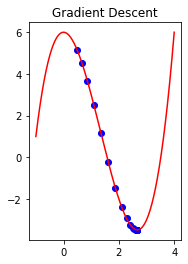

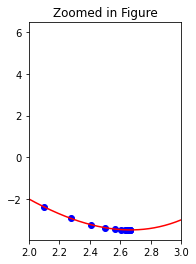

In [ ]:
gradient_precision(0.5, 0.001, 0.05)

In [ ]:
# import automatic differentiator to compute gradient module
from autograd import grad 

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w]           # container for weight history
    cost_history = [g(w)]          # container for corresponding cost function
    for k in range(max_its):
        # evaluate the gradient, store current weights and cost function value
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

>Minimize $\quad g(\omega)=\dfrac{1}{50}\sqrt{\left(\omega^4+\omega^2\right)}$ using gradient method.

In [ ]:
g = lambda w: 1/float(50)*(w**4 + w**2) + 0.5 
w = np.array([2.5]); max_its = 5;
alpha = 1
weight_history,cost_history = gradient_descent(g,alpha,max_its,w)

# Newton's Method

Newton's method alogorithm can be summarized as:
> Algorithm

1. input: function  $g$ , maximum number of steps  $K$ , initial point  $w^0$ , and regularization parameter  $\epsilon$.
2. `for` $k=1\ldots K$

$\quad\quad\quad\quad\mathbf{w}^{k} = \mathbf{w}^{k-1} - \left(\nabla^2 g(\mathbf{w}^{k-1}) + \epsilon \mathbf{I}_{N\times N}\right)^{-1}\nabla g(\mathbf{w}^{k-1})$
3.  output: history of weights  $\left\{\mathbf{w}^{k}\right\}_{k=0}^K$  and corresponding function evaluatiions  $\left\{g\left(\mathbf{w}^{k}\right)\right\}_{k=0}^K$

In [ ]:
# using an automatic differentiator - like the one imported via the statement below - makes coding up gradient descent a breeze
from autograd import grad 
from autograd import hessian

# newtons method function - inputs: g (input function), max_its (maximum number of iterations), w (initialization)
def newtons_method(g,max_its,w,**kwargs):
    # compute gradient module using autograd
    gradient = grad(g)
    hess = hessian(g)
    
    # set numerical stability parameter / regularization parame
    epsilon = 10**(-7)
    if 'epsilon' in kwargs:
        beta = kwargs['epsilon']
# run the newtons method loop
    weight_history = [w]           # container for weight history
    cost_history = [g(w)]          # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient and hessian
        grad_eval = gradient(w)
        hess_eval = hess(w)
# reshape hessian to square matrix for numpy linalg functionality
        hess_eval.shape = (int((np.size(hess_eval))**(0.5)),int((np.size(hess_eval))**(0.5)))
        
        # solve second order system for weight update
        A = hess_eval + epsilon*np.eye(w.size)
        b = grad_eval
        w = np.linalg.solve(A,np.dot(A,w) - b)
# record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

In [ ]:
import numpy as np
g = lambda w: 1/float(50)*(w**4 + w**2) + 0.5 
w = np.array([2.5]); max_its = 5;
weight_history,cost_history = newtons_method(g,max_its,w)

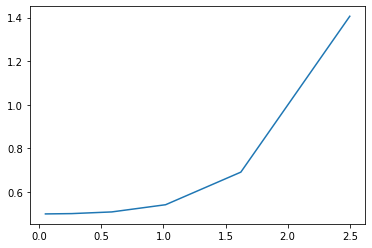

In [ ]:
plt.plot(weight_history,cost_history)